Using All Modules
==================

Now that we've gone through all of the modules individually, we can start to use them all together, and certain arguments that act in multiple modules.

## The ``use_for_javelin`` argument

As seen in the DRW Rejection Module tutorial, the ``use_for_javelin`` argument will take the output DRW parameters from the continuum DRW fit in the DRW Rejection Module and fix the DRW parameters in the subsequent JAVELIN fit in the JAVELIN module.

For the JAVELIN module, both when ``together=True`` and ``together=False``, JAVELIN will fit for both DRW parameters by default. In many cases, an "educated guess" on the DRW parameters can help the JAVELIN fit (and hence the accuracy of the final time lag measurement). The DRW parameters can be fixed by using the ``fixed/p_fix`` arguments if the DRW parameters are known a priori. However, if the DRW parameters aren't know, setting ``use_for_javelin=True`` in the DRW Rejection arguments will fix them to the values produced in the DRW fit of the continuum.

.. warning:: If ``use_for_javelin=True``, ``reject_data`` must be ``True`` for the continuum (i.e. first) light curve input.

.. warning:: If the ``fixed/p_fix`` arguments are set for the JAVELIN module and ``use_for_javelin=True``, the DRW Rejection fit parameters will override the input ``fixed/p_fix`` values. 

In [1]:
import pypetal.pipeline as pl 

main_dir = 'pypetal/examples/dat/javelin_'
filenames = [ main_dir + 'continuum.dat', main_dir + 'yelm.dat']

line_names = ['continuum', 'line1']


Performing DRW rejection
------------------------
jitter: True
nsig: 3.0
nwalker: 100
nburn: 300
nchain: 1000
clip: [ True  True]
reject_data: [ True False]
use_for_javelin: True
------------------------
        


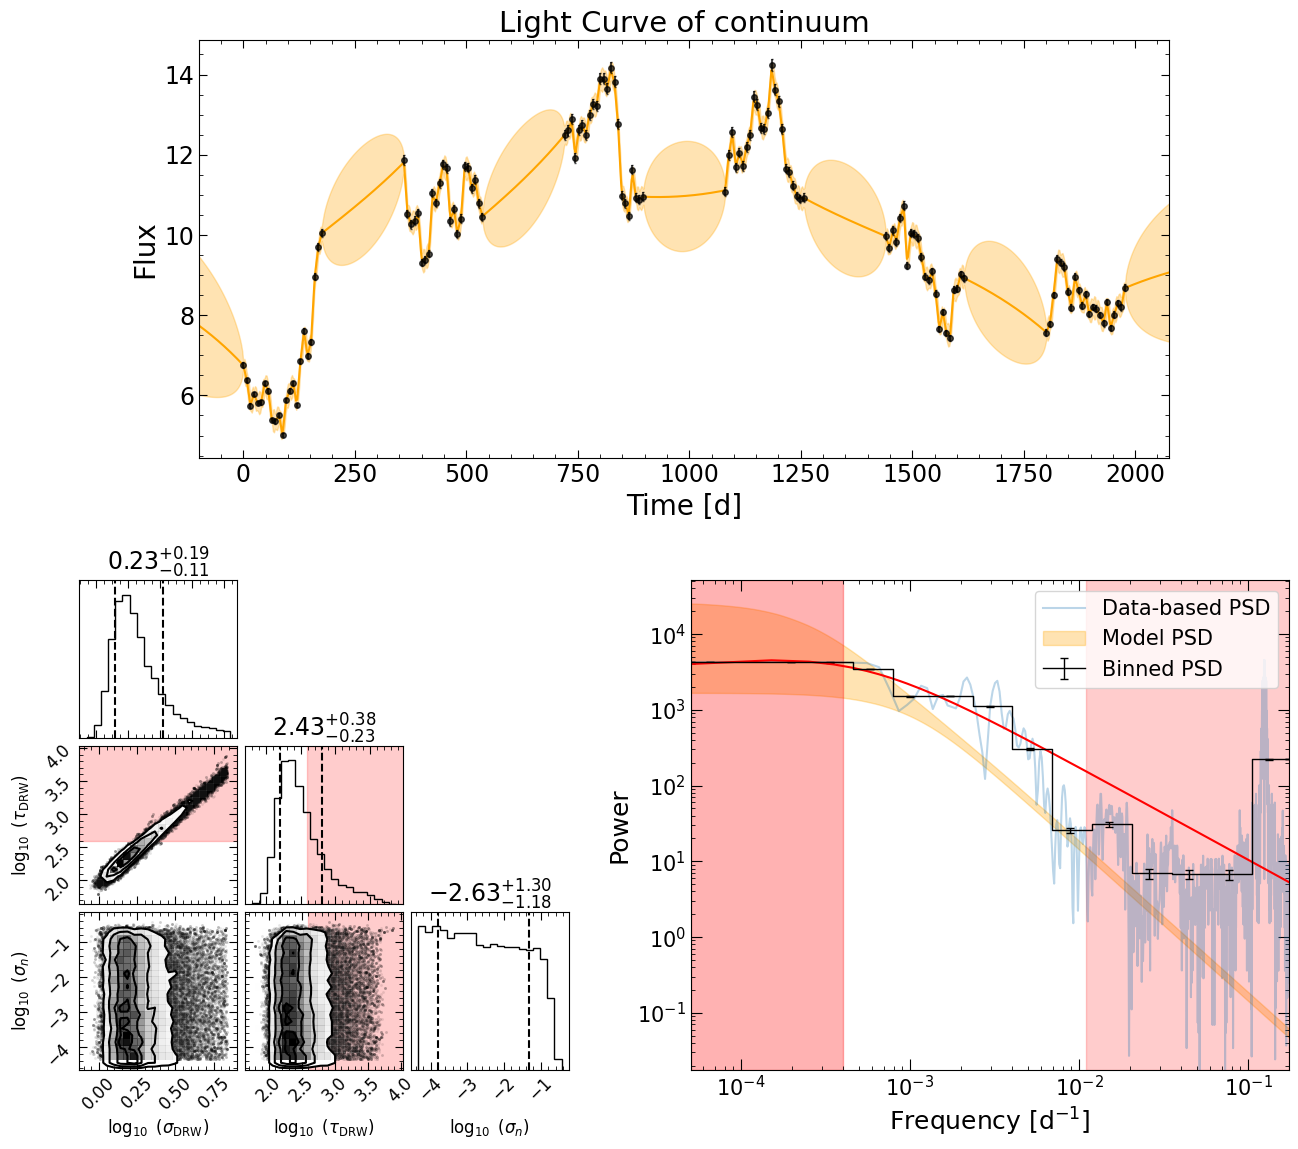


Running JAVELIN
--------------------
rm_type: spec
lagtobaseline: 0.1
laglimit: [[-1976.98849, 1976.98849]]
fixed: True
p_fix: True
subtract_mean: True
nwalker: 50
nburn: 50
nchain: 100
output_chains: True
output_burn: True
output_logp: True
nbin: 100
metric: med
together: True
--------------------
        
run single chain without subdividing matrix 
start burn-in
no priors on sigma and tau
penalize lags longer than 0.10 of the baseline
no penalizing long widths, but within the baseline
nburn: 50 nwalkers: 50 --> number of burn-in iterations: 2500
burn-in finished
save burn-in chains to /home/stone28/projects/petl_mock/test_repo/tot_output1/javelin/burn_rmap.txt
start sampling
sampling finished
acceptance fractions are
0.05 0.16 0.00 0.04 0.01 0.03 0.08 0.09 0.01 0.17 0.01 0.09 0.00 0.08 0.12 0.02 0.07 0.05 0.09 0.09 0.13 0.04 0.08 0.09 0.08 0.07 0.06 0.09 0.05 0.03 0.14 0.10 0.04 0.07 0.01 0.09 0.09 0.07 0.07 0.15 0.03 0.14 0.09 0.08 0.04 0.08 0.09 0.09 0.09 0.08
save MCMC chains to

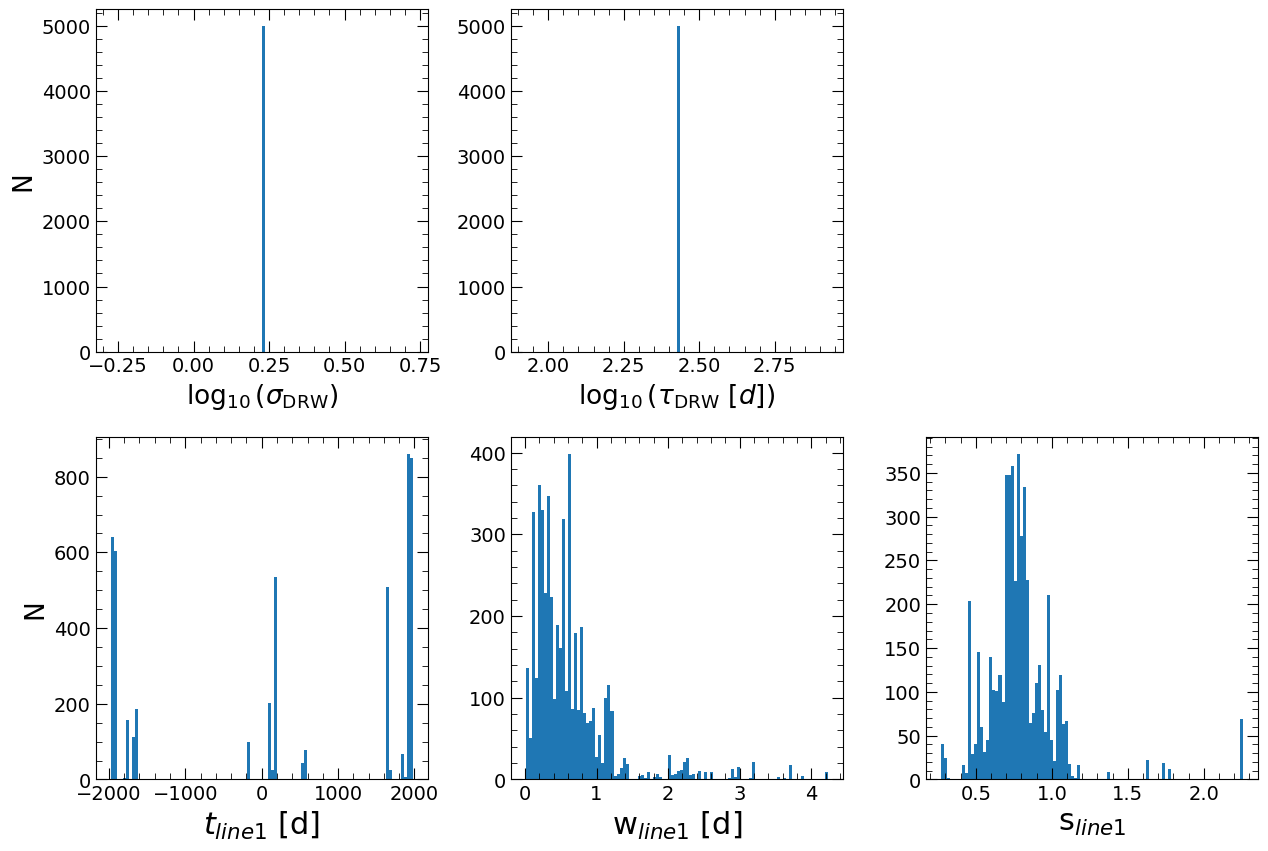

covariance matrix calculated
covariance matrix decomposed and updated by U


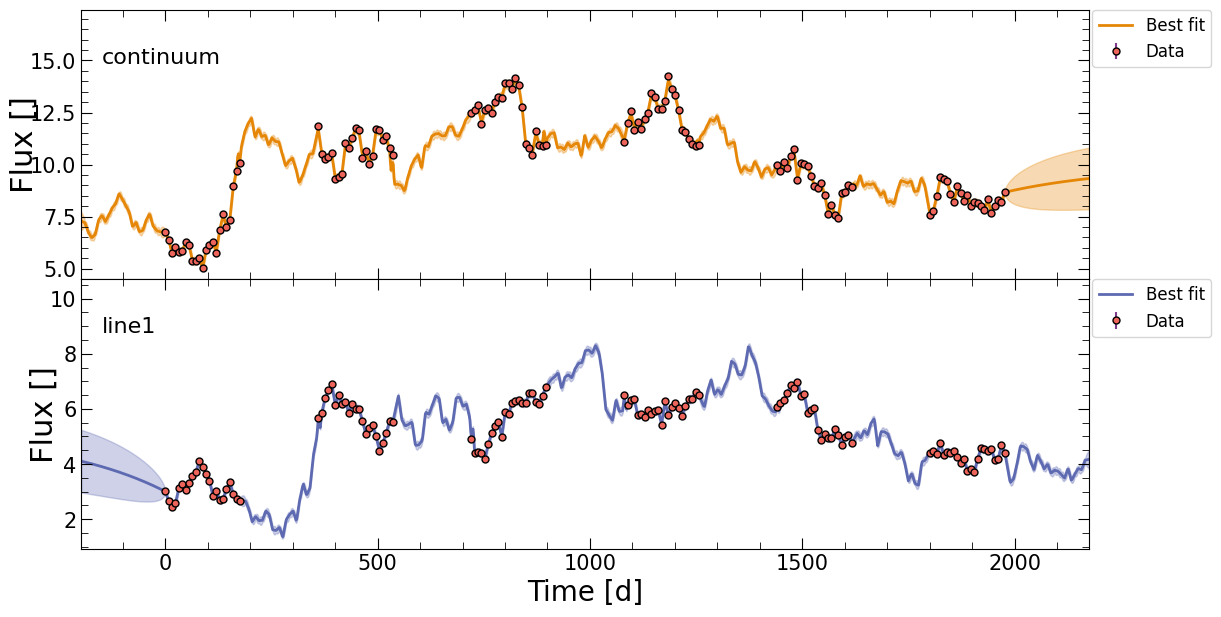

In [2]:
output_dir = 'tot_output1/'

drw_rej_params = {
    'use_for_javelin': True,
    'nsig': 3.0
}

javelin_params = {
    'nwalker': 50,
    'nburn': 50,
    'nchain': 100,
    'lagtobaseline': 0.1,
    'nbin': 100,
    'together': True
}

res = pl.run_pipeline( output_dir, filenames, line_names,
                       run_drw_rej=True, drw_rej_params=drw_rej_params,
                       run_javelin=True, javelin_params=javelin_params,
                       verbose=True,
                       plot=True,
                       file_fmt='ascii',
                       time_unit='d',
                       lc_unit='',
                       threads=45)

## Putting the Pieces Together

Here, we'll run all modules in the pipeline together to show what the output looks like.

In [3]:
main_dir = 'pypetal/examples/dat/javelin_'
filenames = [ main_dir + 'continuum.dat', main_dir + 'yelm.dat', main_dir + 'zing.dat' ]

line_names = ['Continuum', 'H-alpha', 'H-beta']


Performing DRW rejection
------------------------
jitter: True
nsig: 3
nwalker: 100
nburn: 300
nchain: 1000
clip: array
reject_data: [ True False False]
use_for_javelin: True
------------------------
        


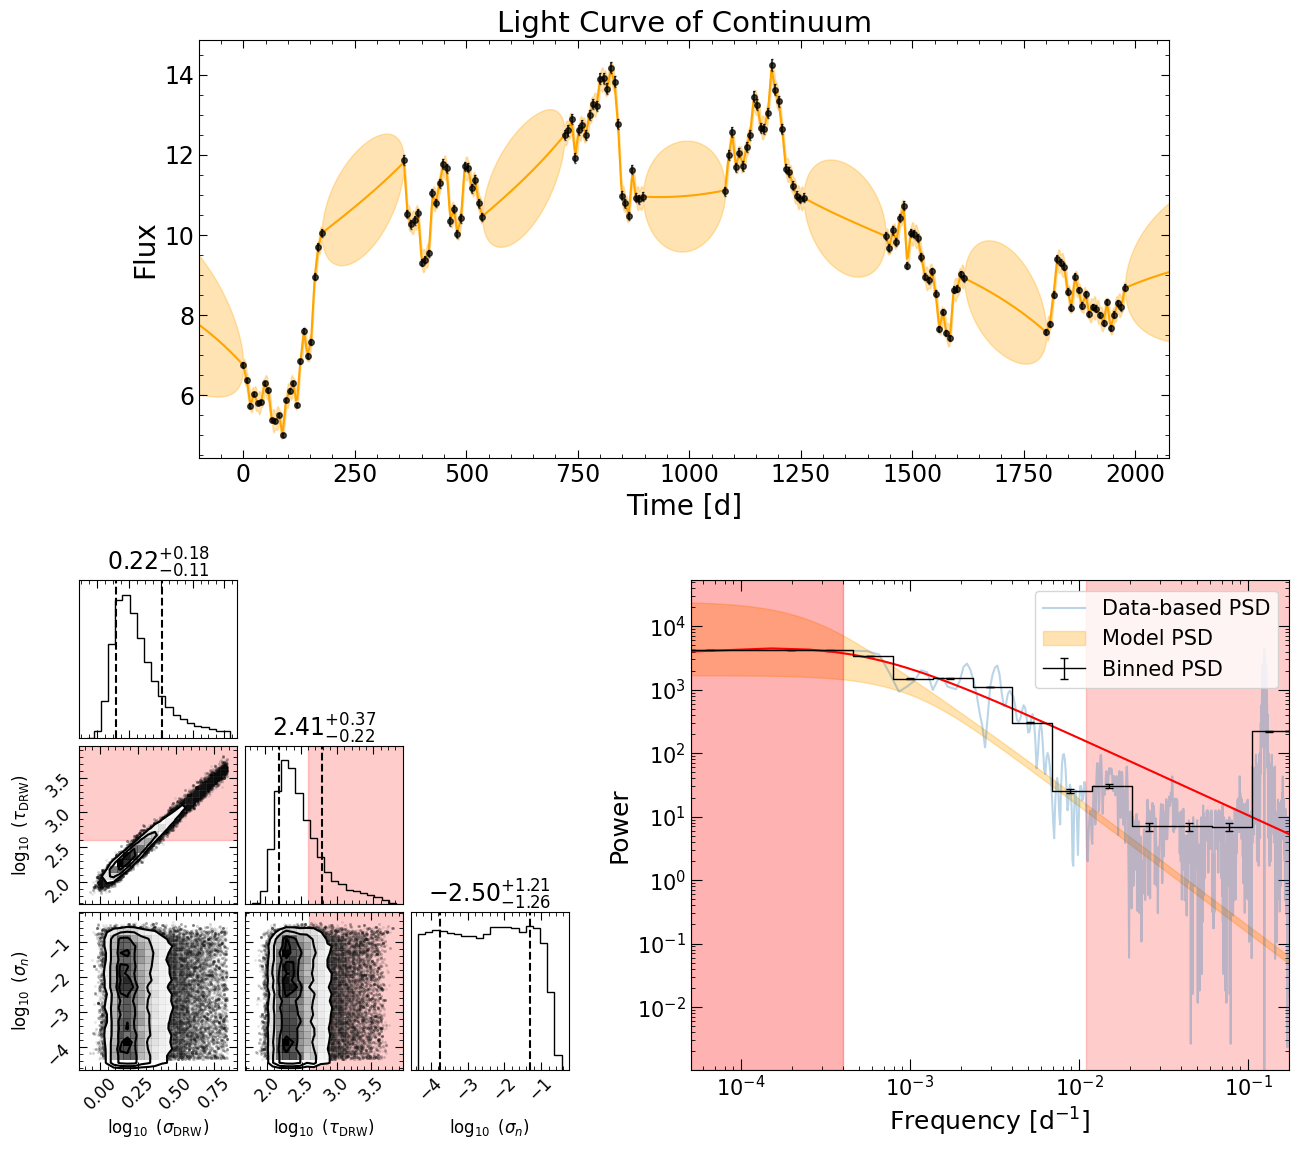


Running detrending
-------------------
parallelize: True
K: 2
nchains: 8
miniter: 5000
maxiter: 10000
-------------------
    
m = 0.000 + 0.000 - 9.625
b = 9.625 + 0.378 - 0.368
sigsqr = 0.000 + 0.000 - 0.000


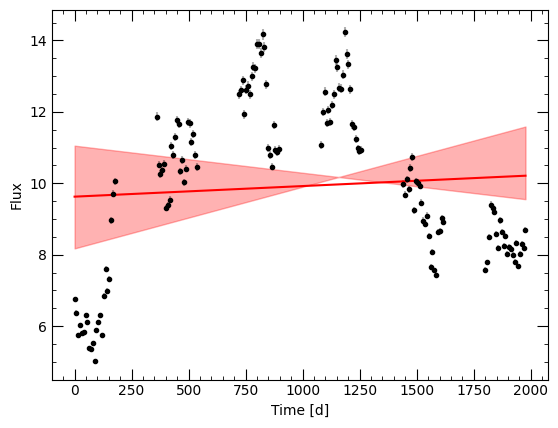

m = 0.000 + 0.000 - 4.625
b = 4.625 + 0.186 - 0.193
sigsqr = 0.000 + 0.000 - 0.000


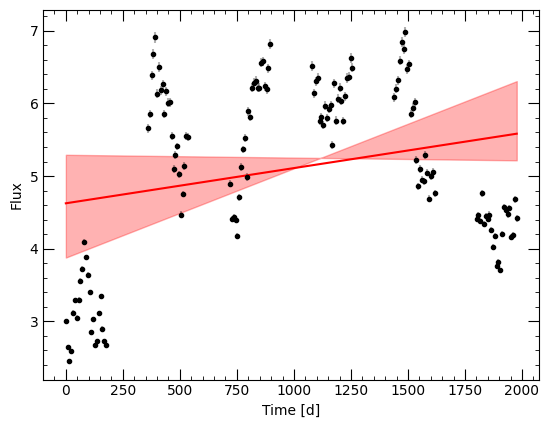

m = 0.000 + 0.000 - 2.032
b = 2.032 + 0.087 - 0.086
sigsqr = 0.000 + 0.000 - 0.000


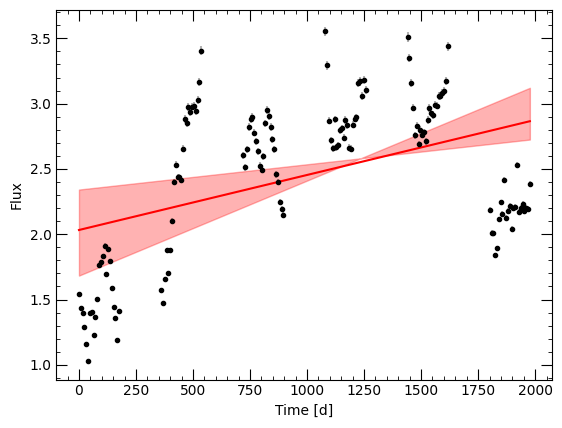


Running pyCCF
-----------------
lag_bounds: [[-1000, 1000], [-1000, 1000]]
interp: 1.5
nsim: 3500
mcmode: 0
sigmode: 0.2
thres: 0.8
nbin: 50
-----------------
        
Failed centroids:  0
Failed peaks:  0


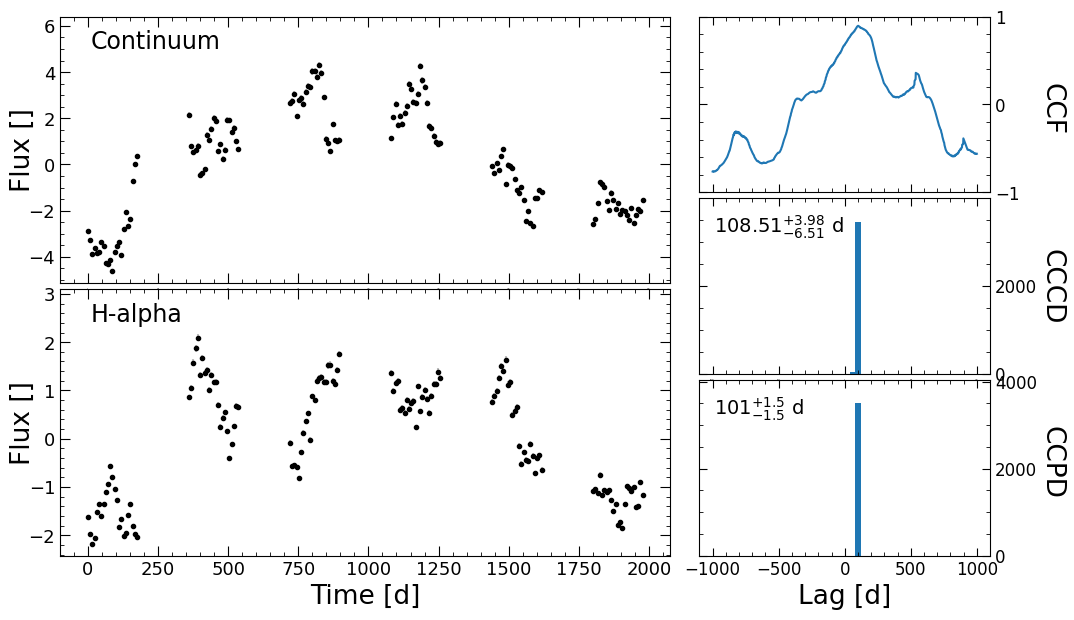

Failed centroids:  0
Failed peaks:  0


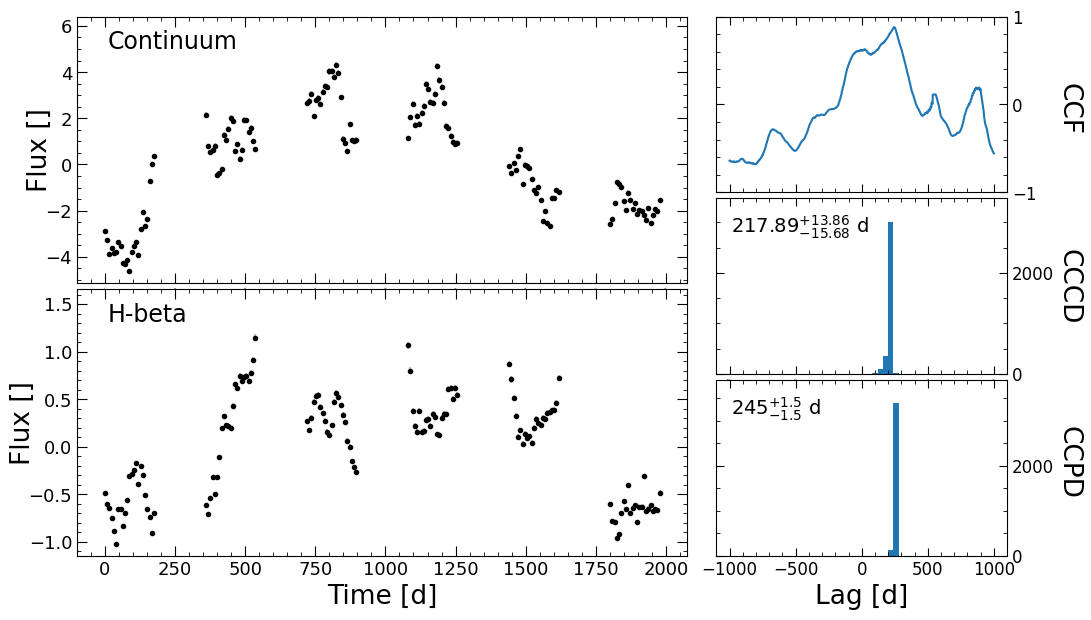


Running pyZDCF
----------------------
nsim: 2000
minpts: 0
uniform_sampling: False
omit_zero_lags: True
sparse: auto
prefix: zdcf
run_plike: True
plike_dir: pypetal/plike_v4/
----------------------
        
Executing PLIKE


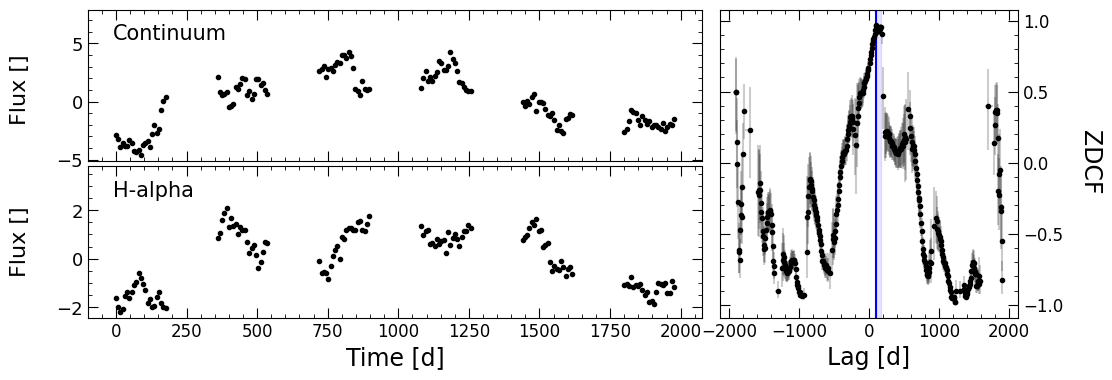

Executing PLIKE


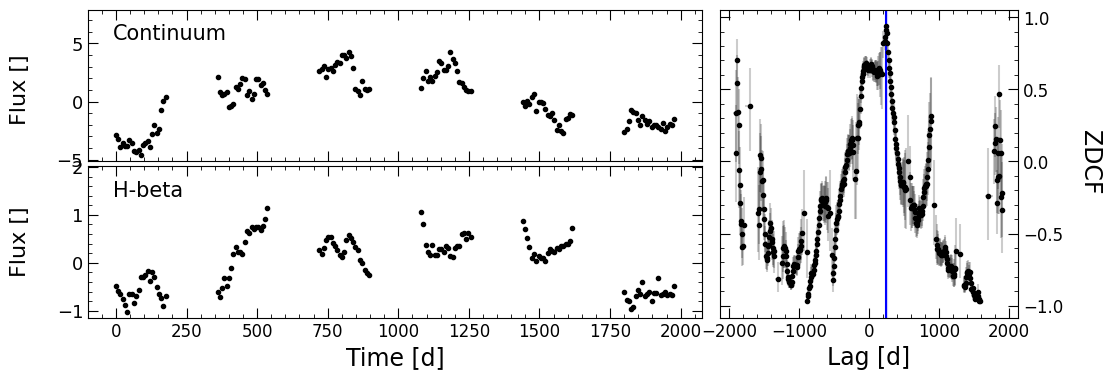


Running JAVELIN
--------------------
rm_type: spec
lagtobaseline: 0.3
laglimit: [[-1000, 1000], [-1000, 1000]]
fixed: True
p_fix: True
subtract_mean: True
nwalker: 100
nburn: 50
nchain: 50
output_chains: True
output_burn: True
output_logp: True
nbin: 50
metric: med
together: False
--------------------
        
run single chain without subdividing matrix 
start burn-in
no priors on sigma and tau
penalize lags longer than 0.30 of the baseline
no penalizing long widths, but within the baseline
nburn: 50 nwalkers: 100 --> number of burn-in iterations: 5000
burn-in finished
save burn-in chains to /home/stone28/projects/petl_mock/test_repo/tot_output2/H-alpha/javelin/burn_rmap.txt
start sampling
sampling finished
acceptance fractions are
0.18 0.16 0.20 0.24 0.00 0.14 0.04 0.18 0.24 0.28 0.24 0.24 0.22 0.14 0.36 0.04 0.24 0.02 0.02 0.28 0.16 0.08 0.16 0.00 0.30 0.20 0.12 0.24 0.20 0.24 0.00 0.10 0.28 0.06 0.04 0.26 0.28 0.16 0.14 0.26 0.22 0.16 0.30 0.02 0.04 0.04 0.00 0.06 0.12 0.26 0.06 0.

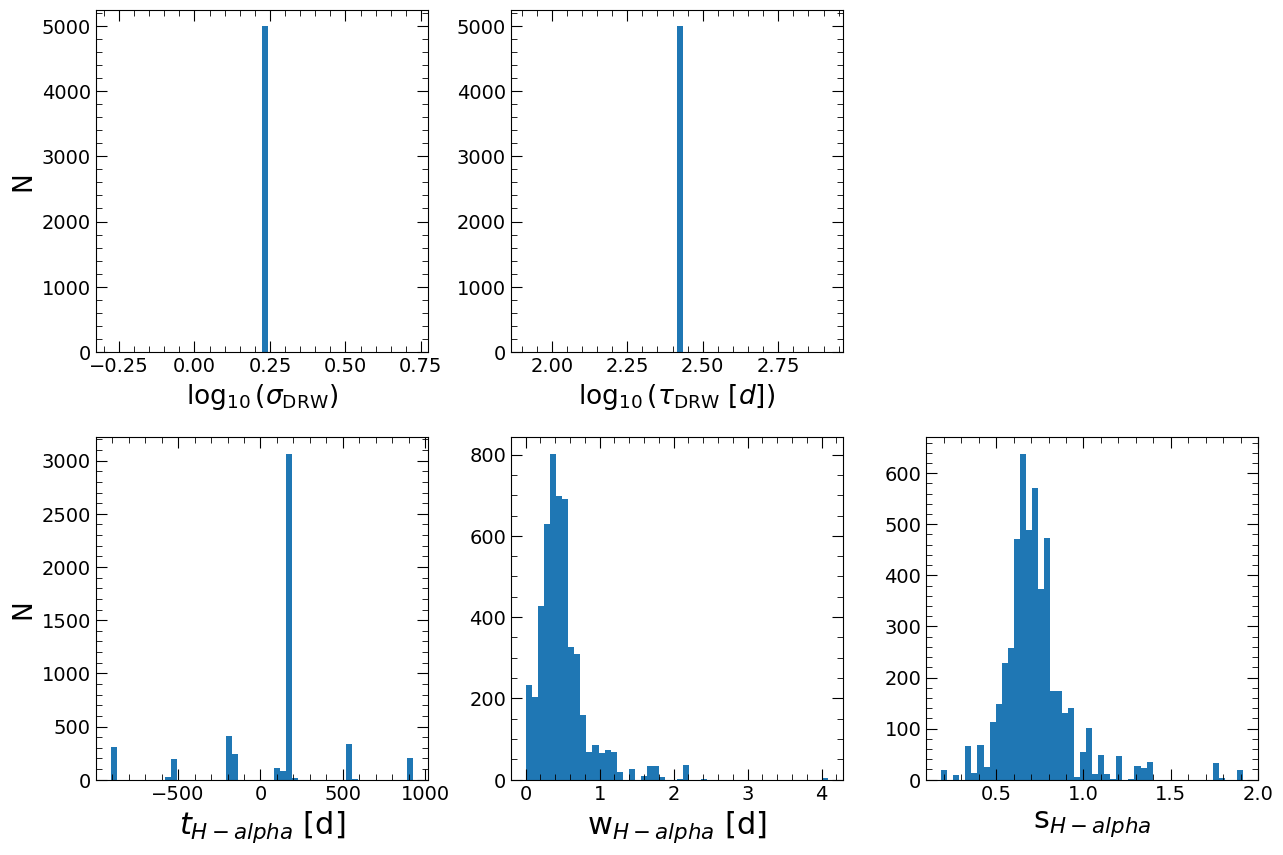

covariance matrix calculated
covariance matrix decomposed and updated by U


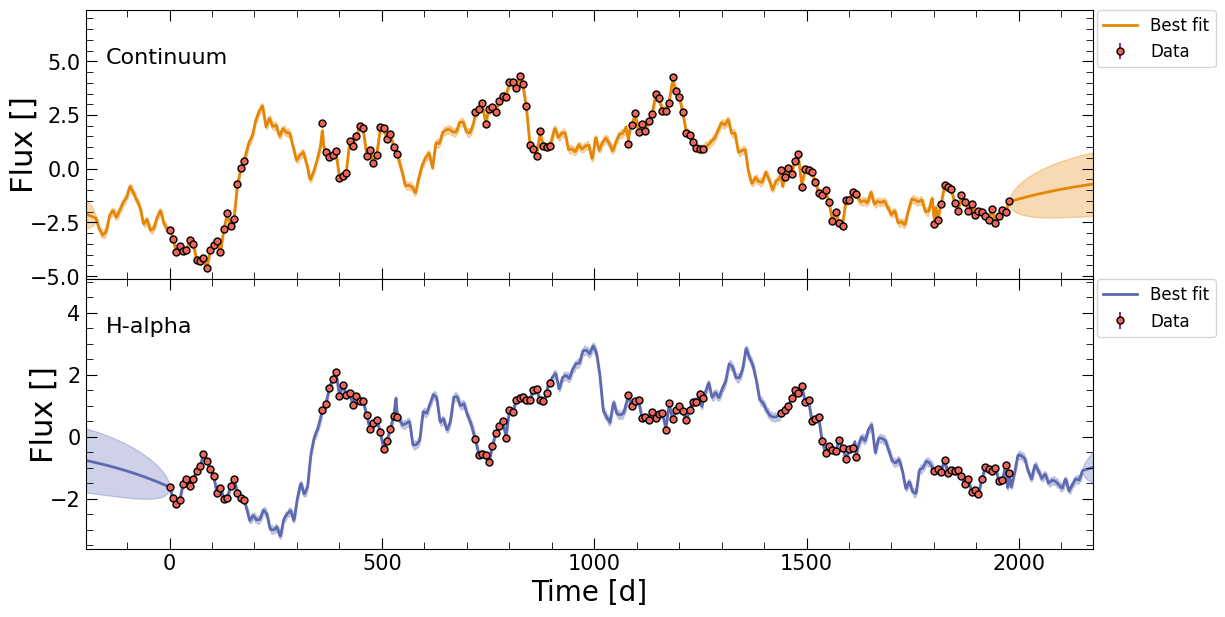

run single chain without subdividing matrix 
start burn-in
no priors on sigma and tau
penalize lags longer than 0.30 of the baseline
no penalizing long widths, but within the baseline
nburn: 50 nwalkers: 100 --> number of burn-in iterations: 5000
burn-in finished
save burn-in chains to /home/stone28/projects/petl_mock/test_repo/tot_output2/H-beta/javelin/burn_rmap.txt
start sampling
sampling finished
acceptance fractions are
0.04 0.12 0.06 0.18 0.12 0.02 0.18 0.00 0.10 0.14 0.12 0.12 0.18 0.00 0.02 0.04 0.14 0.12 0.06 0.04 0.06 0.08 0.00 0.08 0.04 0.00 0.18 0.00 0.10 0.02 0.02 0.16 0.06 0.06 0.16 0.04 0.04 0.06 0.06 0.10 0.10 0.02 0.20 0.14 0.12 0.14 0.06 0.18 0.00 0.04 0.02 0.12 0.02 0.22 0.02 0.18 0.02 0.10 0.06 0.02 0.04 0.06 0.06 0.02 0.06 0.02 0.16 0.02 0.02 0.02 0.02 0.18 0.04 0.12 0.08 0.16 0.02 0.14 0.10 0.22 0.12 0.04 0.16 0.16 0.00 0.08 0.24 0.00 0.02 0.10 0.04 0.02 0.04 0.10 0.12 0.02 0.00 0.04 0.10 0.02
save MCMC chains to /home/stone28/projects/petl_mock/test_repo/tot_outp

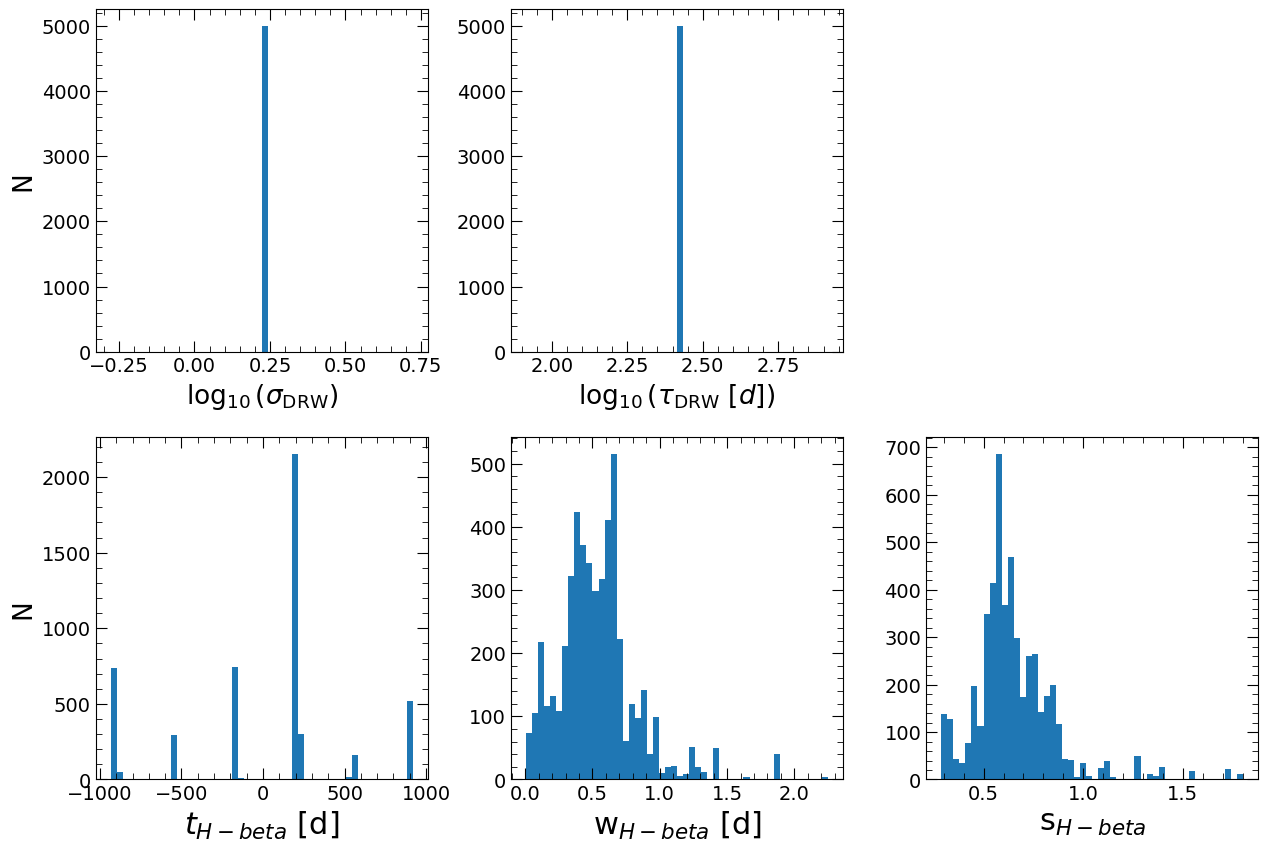

covariance matrix calculated
covariance matrix decomposed and updated by U


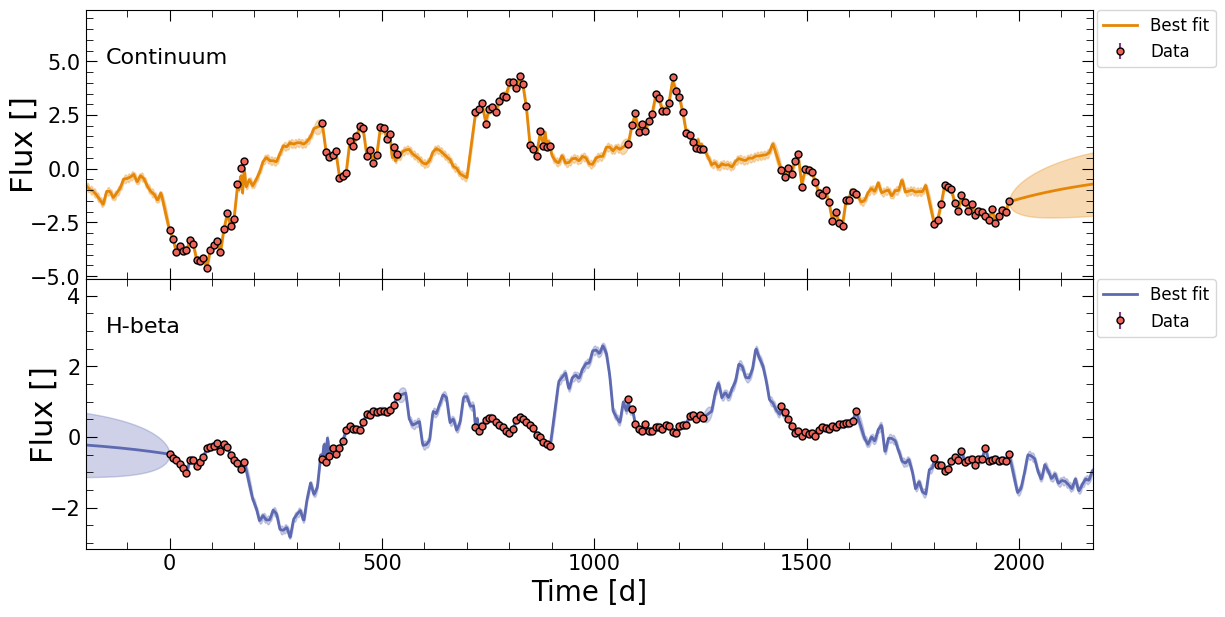

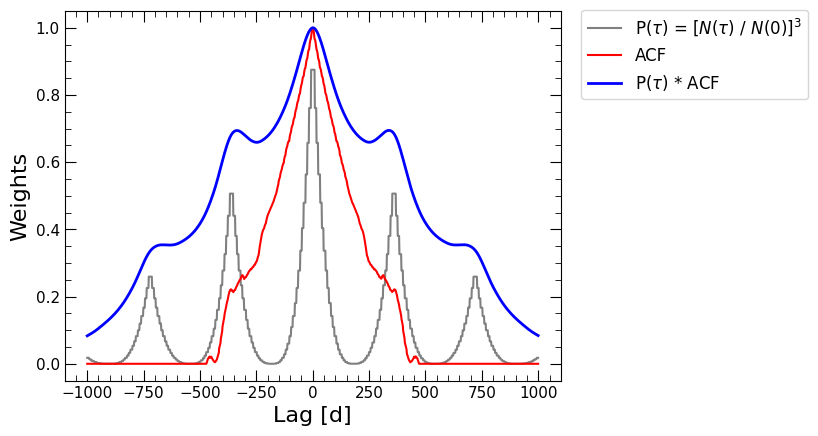

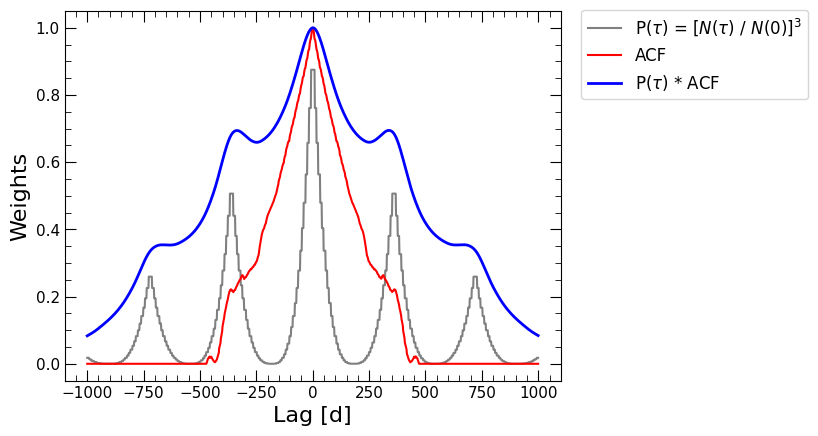

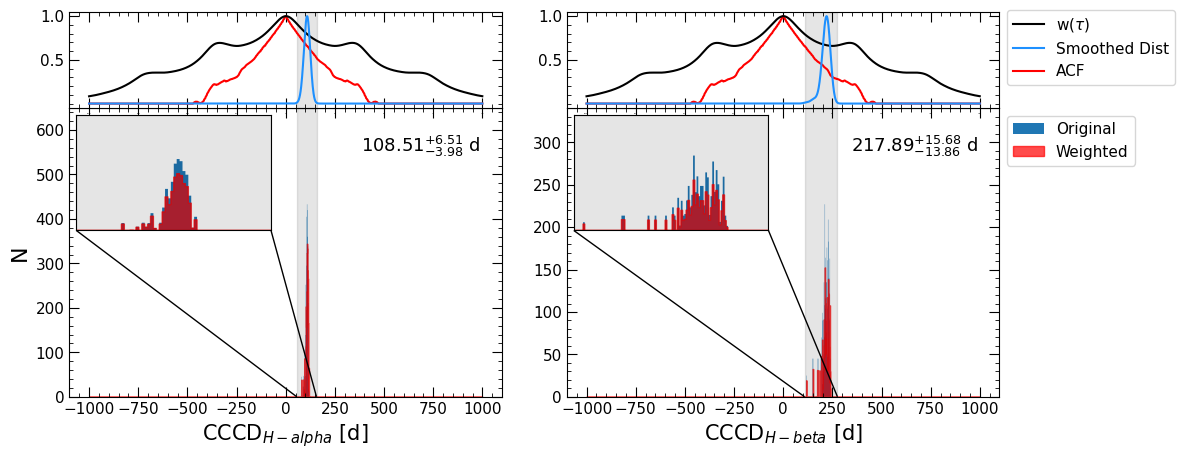

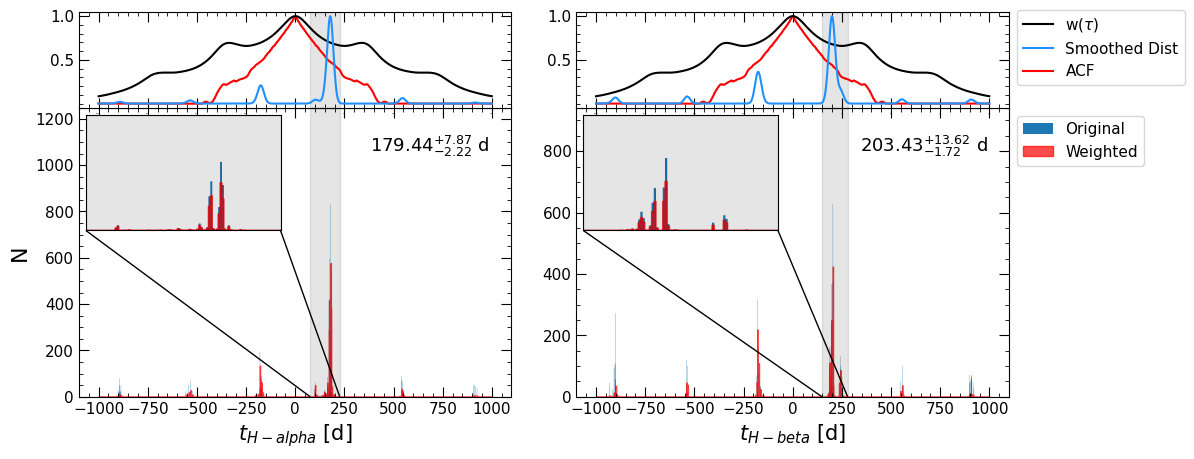

In [4]:
output_dir = 'tot_output2/'

drw_rej_params = {
    'use_for_javelin': True
}

detrend_params = {
    'nchain': 8
}

pyccf_params = {
    'nsim': 3500,
    'interp': 1.5
}

pyzdcf_params = {
    'nsim': 2000,
    'run_plike': True,
    'plike_dir': 'pypetal/plike_v4/',
}

javelin_params = {
    'nchain': 50,
    'nburn': 50,
    'nwalkers': 100,
    'nbin': 50
}

weighting_params = {
    'k': 3
}

res = pl.run_pipeline( output_dir, filenames, line_names,
                       run_drw_rej=True, drw_rej_params=drw_rej_params,
                       run_detrend=True, detrend_params=detrend_params,
                       run_pyccf=True, pyccf_params=pyccf_params,
                       run_pyzdcf=True, pyzdcf_params=pyzdcf_params,
                       run_javelin=True, javelin_params=javelin_params,
                       run_weighting=True, weighting_params=weighting_params,
                       verbose=True,
                       plot=True,
                       file_fmt='ascii',
                       time_unit='d',
                       lag_bounds=[-1000,1000],
                       threads=45)

In [9]:
import numpy as np

print( 'line names:', line_names[1:] )
print('')

#Maximum value of the CCF in the primary peak of the JAVELIN lag distribution (rmax)
print( 'rmax:', res['weighting_res']['rmax'] )
print('')

#pyCCF lags
print( 'pyCCF lags:', np.array(res['weighting_res']['pyccf']['centroid']).T[1] )
print( 'pyCCF fraction rejected:', res['weighting_res']['pyccf']['frac_rejected'] )
print('')

#JAVELIN lags
print( 'JAVELIN lags:', np.array(res['weighting_res']['javelin']['tophat_lag']).T[1] )
print( 'JAVELIN fraction rejected:', res['weighting_res']['javelin']['frac_rejected'] )

line names: ['H-alpha', 'H-beta']

rmax: [0.8951888054366631, 0.8800834498940546]

pyCCF lags: [108.507 217.894]
pyCCF fraction rejected: [0.0, 0.0]

JAVELIN lags: [179.442 203.431]
JAVELIN fraction rejected: [0.3448, 0.5072]


The lag results obtained in this run are relatively good, with high $r_{max}$, low fraction rejected for pyCCF, and decent fraction rejected for JAVELIN.

In [31]:
from pypetal.petalio import err2str

fix_str = {
    ord('{'): ' ',
    ord('}'): None,
    ord('^'): None,
    ord('_'): None
    }

ha_cent = res['weighting_res']['pyccf']['centroid'][0]
ha_javlag = res['weighting_res']['javelin']['tophat_lag'][0]
print( 'H-alpha pyCCF lag:',  err2str( ha_cent[1], ha_cent[2], ha_cent[0] ).translate(fix_str) )
print( 'H-alpha JAVELIN lag:',  err2str( ha_javlag[1], ha_javlag[2], ha_javlag[0] ).translate(fix_str) )
print('')

hb_cent = res['weighting_res']['pyccf']['centroid'][1]
hb_javlag = res['weighting_res']['javelin']['tophat_lag'][1]
print( 'H-beta pyCCF lag:',  err2str( hb_cent[1], hb_cent[2], hb_cent[0] ).translate(fix_str) )
print( 'H-beta JAVELIN lag:',  err2str( hb_javlag[1], hb_javlag[2], hb_javlag[0] ).translate(fix_str) )

H-alpha pyCCF lag: 108.51 +3.98 -6.51
H-alpha JAVELIN lag: 179.44 +2.22 -7.87

H-beta pyCCF lag: 217.89 +13.86 -15.68
H-beta JAVELIN lag: 203.43 +1.72 -13.62


We can see that the ${\rm H}\beta$ lags fall within $1\sigma$ of each other. The ${\rm H}\alpha$ lags do not fall within $1\sigma$ of each other, and differ by $\sim 60$ d. This difference may be due to either aliasing, the detrending method, or other systematics.